In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_train = pd.read_csv('../data/processed/cv/0/1/train.csv', header=None, sep='\t')
df_val = pd.read_csv('../data/processed/cv/0/1/val.csv', header=None, sep='\t')
df_test = pd.read_csv('../data/processed/cv/0/1/test.csv', header=None, sep='\t')

In [3]:
def total_neighbors(G, x, y):
    return len(list(G.neighbors(x))) + len(list(G.neighbors(y)))

59.0
7.0


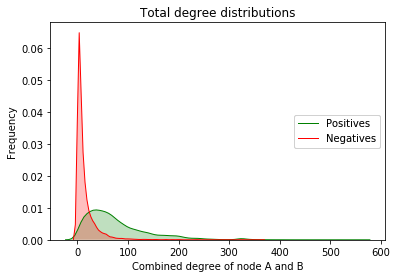

In [4]:
fig, ax = plt.subplots(1, 1)

i=0

train_pos = df_train.iloc[:,:2].values
test_edges = df_test.iloc[:,:2].values
test_link_labels = df_test.iloc[:,2].values

pos_test, neg_test = test_edges[test_link_labels==1], test_edges[test_link_labels==0]
nodes = set(np.concatenate((train_pos, test_edges)).flatten())

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(train_pos)

pos_neighbors = np.array([total_neighbors(G, x[0], x[1]) for x in pos_test])
neg_neighbors = np.array([total_neighbors(G, x[0], x[1]) for x in neg_test])

print(np.median(pos_neighbors))
print(np.median(neg_neighbors))

x, y = int(i/2), int(i%2)

axis = ax

axis.set_title('Total degree distributions')

sns.distplot(pos_neighbors, hist = False, kde = True,
             kde_kws = {'linewidth': 1, "shade":True},
             label = 'Positives', ax = axis, color='green')

sns.distplot(neg_neighbors, hist = False, kde = True,
             kde_kws = {'linewidth': 1, "shade":True},
             label = 'Negatives', ax = axis, color='red')

# custom_xlim = (0, 300)
# custom_ylim = (0, .103)
# plt.setp(axis, ylim=custom_ylim, xlim=custom_xlim)

legend_a = axis.legend(loc="center right")
axis.add_artist(legend_a)
axis.set_xlabel('Combined degree of node A and B')
axis.set_ylabel('Frequency')
plt.savefig('degree_dist.png')
plt.show()
